In [2]:
library(tidyverse)

In [3]:
library(data.table)


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [38]:
df = read_delim("abortion.csv", delim = ",")
df = as.data.table(df)

New names:
* `` -> ...1

Rows: 19584 Columns: 22

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl (22): ...1, fip, age, race, year, sex, totpop, ir, crack, alcohol, incom...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [39]:
df = df[!is.na(lnr) & !is.na(totpop),,]

In [40]:
df[is.na(df)] <- 0

In [41]:
dim(df)

[1] 17921    22

In [8]:
install.packages("randomForest")
library(randomForest)

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Anar\AppData\Local\Temp\RtmpwV38NA\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 4.1.2"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




In [9]:
install.packages("caTools")
install.packages("Metrics")

package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Anar\AppData\Local\Temp\RtmpwV38NA\downloaded_packages
package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Anar\AppData\Local\Temp\RtmpwV38NA\downloaded_packages


In [10]:
library(caTools)
library(Metrics)

Warning message:
"package 'caTools' was built under R version 4.1.2"
Warning message:
"package 'Metrics' was built under R version 4.1.2"


In [12]:
set.seed(1)
sample = sample.split(df$lnr, SplitRatio = .70)
train = subset(df, sample == TRUE)
test  = subset(df, sample == FALSE)
dim(train)
dim(test)

[1] 12544    22

[1] 5377   22

In [13]:
train = train[,.(age, race, sex, totpop, lnr, ir, crack, alcohol, income, poverty, ur, repeal, acc, younger, pi, bf15),]

In [14]:
test = test[,.(age, race, sex, totpop, lnr, ir, crack, alcohol, income, poverty, ur, repeal, acc, younger, pi, bf15),]

In [15]:
model = randomForest(lnr ~., data = train, mtry = 3,
                         importance = TRUE, na.action = na.omit)

In [16]:
ans = predict(model, test[,.(age, race, sex, totpop, ir, crack, alcohol, income, poverty, ur, repeal, acc, younger, pi, bf15),])

In [17]:
print(cor(test[,.(lnr),],ans)^2) #R^2 score

         [,1]
lnr 0.9518969


In [18]:
print(rmse(ans, test[,.(lnr),]$lnr)) #rmse

[1] 0.4746191


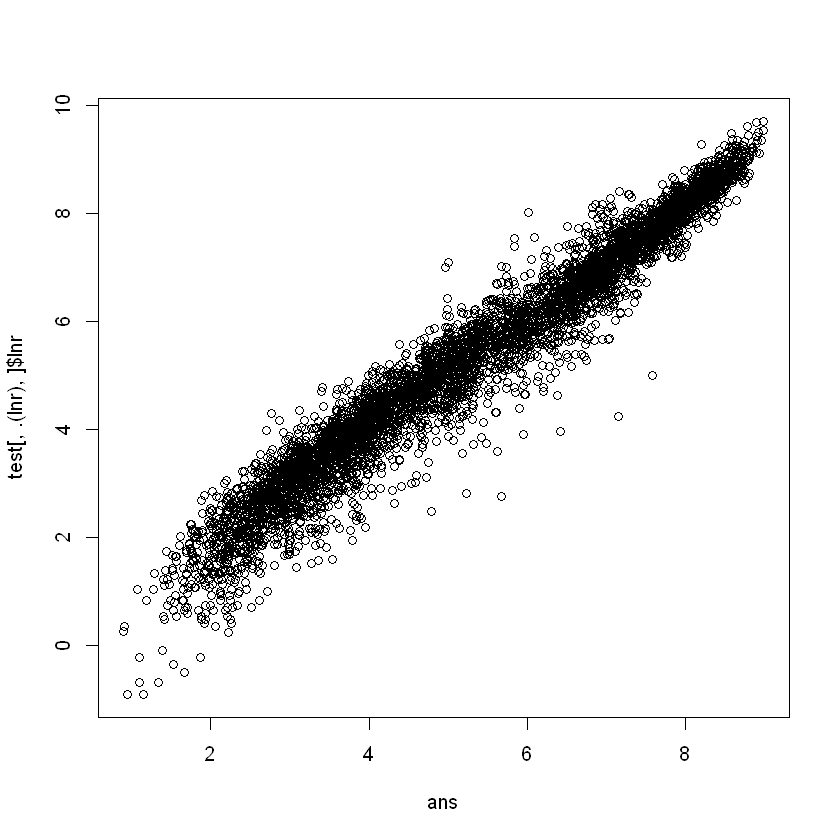

In [19]:
plot(ans, test[,.(lnr),]$lnr)

## LNR (Logged gonnorhea cases per 100,000 in 15-19 year olds) analysis

In [43]:
df

...1,fip,age,race,year,sex,totpop,ir,crack,alcohol,⋯,poverty,repeal,acc,wht,male,lnr,younger,fa,pi,bf15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,30,2,1985,1,78805,371.47580,0.2174378,1.9,⋯,20.6,0,0.6795045,0,1,7.880880,0,0,0,0
2,1,15,1,1985,2,224003,51.38925,0.2174378,1.9,⋯,20.6,0,0.6795045,1,0,6.362165,1,1,0,0
3,1,20,2,1985,2,94113,390.87567,0.2174378,1.9,⋯,20.6,0,0.6795045,0,0,8.917793,0,0,0,0
4,1,20,1,1985,1,252076,100.83680,0.2174378,1.9,⋯,20.6,0,0.6795045,1,1,5.906995,0,0,0,0
5,1,20,2,1985,1,94113,390.87567,0.2174378,1.9,⋯,20.6,0,0.6795045,0,1,9.072009,0,0,0,0
6,1,40,2,1985,1,48527,199.46300,0.2174378,1.9,⋯,20.6,0,0.6795045,0,1,6.344056,0,0,0,0
7,1,35,2,1985,2,68459,243.25624,0.2174378,1.9,⋯,20.6,0,0.6795045,0,0,6.135781,0,0,0,0
8,1,40,1,1985,2,177798,70.06068,0.2174378,1.9,⋯,20.6,0,0.6795045,1,0,2.740840,0,0,0,0
9,1,20,1,1985,2,252076,100.83680,0.2174378,1.9,⋯,20.6,0,0.6795045,1,0,6.480964,0,0,0,0


In [44]:
df[!is.na(lnr) & !is.na(totpop),`:=`(gender = factor(df$sex, labels = c("male", "female")), 
                                          rest = factor(df$repeal, labels = c("yes", "no")),
                                         eth = factor(df$race, labels = c("white", "black"))),]

In [45]:
df

...1,fip,age,race,year,sex,totpop,ir,crack,alcohol,⋯,wht,male,lnr,younger,fa,pi,bf15,gender,rest,eth
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,1,30,2,1985,1,78805,371.47580,0.2174378,1.9,⋯,0,1,7.880880,0,0,0,0,male,yes,black
2,1,15,1,1985,2,224003,51.38925,0.2174378,1.9,⋯,1,0,6.362165,1,1,0,0,female,yes,white
3,1,20,2,1985,2,94113,390.87567,0.2174378,1.9,⋯,0,0,8.917793,0,0,0,0,female,yes,black
4,1,20,1,1985,1,252076,100.83680,0.2174378,1.9,⋯,1,1,5.906995,0,0,0,0,male,yes,white
5,1,20,2,1985,1,94113,390.87567,0.2174378,1.9,⋯,0,1,9.072009,0,0,0,0,male,yes,black
6,1,40,2,1985,1,48527,199.46300,0.2174378,1.9,⋯,0,1,6.344056,0,0,0,0,male,yes,black
7,1,35,2,1985,2,68459,243.25624,0.2174378,1.9,⋯,0,0,6.135781,0,0,0,0,female,yes,black
8,1,40,1,1985,2,177798,70.06068,0.2174378,1.9,⋯,1,0,2.740840,0,0,0,0,female,yes,white
9,1,20,1,1985,2,252076,100.83680,0.2174378,1.9,⋯,1,0,6.480964,0,0,0,0,female,yes,white


## ACC (AIDS mortality per 100,000 cumulative in t, t-1, t-2, t-3) analysis. We will do bootstrap for mean estimation

In [46]:
df = df[!is.na(acc),,]

In [47]:
boot_method = function(X, Y, weights_x, weights_y, B, alpha){
    n_x = length(X)
    n_y = length(Y)
    est = mean(X) / mean(Y)
    mhat.boot = numeric(B)
    for(j in 1:B){
        X.boot = sample(X, n_x, replace = TRUE)
        Y.boot = sample(Y, n_y, replace = TRUE)
        mhat.boot[j] = (sum(X.boot*weights_x)/sum(weights_x))/(sum(Y.boot*weights_y)/sum(weights_y))
    }
    std.boot = sd(mhat.boot)
    res = matrix(0, nrow = 3, ncol = 3)
    res[1,] = c(quantile(mhat.boot, alpha/2, names=FALSE), est,  quantile(mhat.boot, 1 - alpha/2, names = FALSE))
    res[2,] = c(2*est - quantile(mhat.boot, 1 - alpha/2, , names=FALSE),est, 2*est - quantile(mhat.boot, alpha/2, names=FALSE))
    res[3,] = c(est + qnorm(alpha/2)*std.boot,est, est + qnorm(1 - alpha/2)*std.boot)
    return(res)
}

In [48]:
males = df[gender == "male",,]
females = df[gender == "female",,]

In [49]:
result0 = data.frame()
result0 = result0 %>% add_column(method = character(0))
result0 = result0 %>% add_column(lower_bound = numeric(0))
result0 = result0 %>% add_column(estimate = numeric(0))
result0 = result0 %>% add_column(upper_bound = numeric(0))

In [50]:
values = boot_method(males$acc, females$acc, males$totpop, females$totpop, 100, 0.05)

In [51]:
result0 = result0 %>% add_row(method = c("boot_meth1", "boot_meth2", "boot_meth3"), lower_bound = values[,1], 
                            estimate = values[,2], 
                            upper_bound = values[,3])

In [52]:
print(result0)

      method lower_bound estimate upper_bound
1 boot_meth1   0.9502788  1.00932    1.076694
2 boot_meth2   0.9419454  1.00932    1.068360
3 boot_meth3   0.9415159  1.00932    1.077123


In [53]:
Cauc_ame = df[eth == "white",,]
Afr_ame = df[eth == "black",,]

In [54]:
result1 = data.frame()
result1 = result1 %>% add_column(method = character(0))
result1 = result1 %>% add_column(lower_bound = numeric(0))
result1 = result1 %>% add_column(mean_estimate = numeric(0))
result1 = result1 %>% add_column(upper_bound = numeric(0))

In [55]:
values = boot_method(Cauc_ame$acc, Afr_ame$acc, Cauc_ame$totpop, Afr_ame$totpop, 100, 0.05)

In [56]:
result1 = result1 %>% add_row(method = c("boot_meth1", "boot_meth2", "boot_meth3"), lower_bound = values[,1], 
                            mean_estimate = values[,2], 
                            upper_bound = values[,3])

In [57]:
print(result1)

      method lower_bound mean_estimate upper_bound
1 boot_meth1   0.8220296     0.8670761   0.9208570
2 boot_meth2   0.8132952     0.8670761   0.9121226
3 boot_meth3   0.8174071     0.8670761   0.9167451


In [63]:
No_rest = df[repeal == 1,,]
yes_rest = df[repeal == 0,,]

In [64]:
result2 = data.frame()
result2 = result2 %>% add_column(method = character(0))
result2 = result2 %>% add_column(lower_bound = numeric(0))
result2 = result2 %>% add_column(mean_estimate = numeric(0))
result2 = result2 %>% add_column(upper_bound = numeric(0))

In [65]:
values = boot_method(No_rest$acc, yes_rest$acc, No_rest$totpop, yes_rest$totpop, 100, 0.05)

In [66]:
result2 = result2 %>% add_row(method = c("boot_meth1", "boot_meth2", "boot_meth3"), lower_bound = values[,1], 
                            mean_estimate = values[,2], 
                            upper_bound = values[,3])

In [67]:
print(result2)

      method lower_bound mean_estimate upper_bound
1 boot_meth1    1.540668       1.68349    1.881247
2 boot_meth2    1.485733       1.68349    1.826312
3 boot_meth3    1.523100       1.68349    1.843880
